<a href="https://colab.research.google.com/github/madeleinekirk/podcast-tesr/blob/main/Formula_One_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formula One Predictions Project
by Madeleine Kirk

**Problem Statement:**

In Formula One, minimizing lap time variation is critical to maintaining race pace, optimizing tire strategy, and avoiding performance drop offs that can lead to position losses or increased pit frequency. Maintaining a low lap variation as close to fastest lap speed as possible teams and drivers will have the best outcomes. Lap time consistancy is affected by multiple factors including driver behavior, tire strategy, and race enviormental conditions which can make it difficult to manage in real time with how quick the races are.

This project aims to predict lap time variation for each driver-stint using pre-race and in-race variables such as track temperature, tire compound, driver agression, and fast lap attempts. By identifying which factors most influence lap variability, teams can optimize performance strategies and reduce inconsistency and improve race outcomes.

Understanding what causes lap instability can help teams make smarter tire and fuel decisions, reduce unnessesary pit stops, and maintain consistent pace. Predicting how behavioral patterns like agression affect consistency allows targeted feedback for drivers under different track conditions. Modeling variability is not just about raw speed. It gives a more complete view of performance which is especially valuable for long-term car and team development to determine what changes need to be made for future races.

**Project Outline:**
1. Data Exploration and Preperation: Clean reliable data is the foundation for model accuracy and it reduces the risk of training on misleading patterns. Data preperation will restructure variable types to best suit the problem and address missing values. Exploratry data analysis will analyze histograms, scatter plots, box plots, and heatmaps to look for correlations between weather and different strategy features.
2. Model Selection: Linear Regression is the benchmark model to understand the linear relationships in the data. Ridge Regression is to test whether regularization improves generalization by shrinking less features. Lasso Regression is used for its ability to perform both regularization and feature selection by zeroing out coefficients. Random Forest Regressor is used as the primary non-linear model because of its strong performance on structured data and its ability to model interactions to outliers. XGBoost Regressor is chosen for its accuracy, regularization, and predictive power.
3. Model Training: The data is split 80/20 into training and test sets. Linear, Lasso, and Ridge Regression are trained on scaled data with standardized numeric features. Random Forest Regressor and XGBoost use raw unscaled data. All models are tuned under its algorithmic needs to minimize overfitting and increase performance.
4. Models are evaluted using R squared score to measure variance, Mean Squared Error to penalize large errors, and Mean Absolute Error to measure average prediction error. Residual Plots and Learning Curves are used to further evalute the models accuracy and success.
5. Model Interpretation: Feature Importance Plots and Coefficient Plots are used to explain how the models work and what the models are considered with the most to make predictions.


Data Collection:
Data is from https://www.kaggle.com/datasets/akashrane2609/f1-stint-data-with-aggression-scores

In [ ]:
import pandas as pd
import sys
import numpy as np
import scipy
from scipy.stats import trim_mean
import matplotlib.pylab as plt
import sklearn

race_data = pd.read_csv('/race_data.csv')

print("ndim:", race_data.ndim)
print("shape", race_data.shape)
print("size", race_data.size)

ndim: 2
shape (7374, 30)
size 221220


In [ ]:
print("info:", race_data.info)
print("description:", race_data.describe)
print("head:", race_data.head)
print("tail:", race_data.tail)


info: <bound method DataFrame.info of       Season  Round                         Circuit                Driver  \
0       2018      1  Albert Park Grand Prix Circuit      Sebastian Vettel   
1       2018      1  Albert Park Grand Prix Circuit      Sebastian Vettel   
2       2018      1  Albert Park Grand Prix Circuit        Lewis Hamilton   
3       2018      1  Albert Park Grand Prix Circuit        Lewis Hamilton   
4       2018      1  Albert Park Grand Prix Circuit  Kimi RÃƒÂ¤ikkÃƒÂ¶nen   
...      ...    ...                             ...                   ...   
7369    2024     24              Yas Marina Circuit       Valtteri Bottas   
7370    2024     24              Yas Marina Circuit       Valtteri Bottas   
7371    2024     24              Yas Marina Circuit      Franco Colapinto   
7372    2024     24              Yas Marina Circuit      Franco Colapinto   
7373    2024     24              Yas Marina Circuit       Sergio PÃƒÂ©rez   

     Constructor  Laps  Position  Tot

In [ ]:
missing = race_data.isnull().sum()
print(missing[missing > 0])

AvgPitStopTime              185
Race Name                   373
Date                        373
Time_of_race                373
Location                    373
Country                     373
Air_Temp_C                  373
Track_Temp_C                373
Humidity_%                  373
Wind_Speed_KMH              373
Lap Time Variation          185
Tire Usage Aggression        66
Fast Lap Attempts           185
Driver Aggression Score     185
Stint                       109
Tire Compound               109
Stint Length                109
Pit_Lap                    2810
Pit_Time                    281
dtype: int64


# Cleaning Data

---



In [ ]:
race_data[race_data['Race Name'].isnull()].shape


(373, 30)

In [ ]:
pit_data = race_data[race_data['Pit_Lap'].notnull()]
print(pit_data)



      Season  Round                         Circuit                Driver  \
0       2018      1  Albert Park Grand Prix Circuit      Sebastian Vettel   
2       2018      1  Albert Park Grand Prix Circuit        Lewis Hamilton   
4       2018      1  Albert Park Grand Prix Circuit  Kimi RÃƒÂ¤ikkÃƒÂ¶nen   
6       2018      1  Albert Park Grand Prix Circuit      Daniel Ricciardo   
8       2018      1  Albert Park Grand Prix Circuit       Fernando Alonso   
...      ...    ...                             ...                   ...   
7365    2024     24              Yas Marina Circuit           Liam Lawson   
7366    2024     24              Yas Marina Circuit           Liam Lawson   
7367    2024     24              Yas Marina Circuit           Liam Lawson   
7369    2024     24              Yas Marina Circuit       Valtteri Bottas   
7371    2024     24              Yas Marina Circuit      Franco Colapinto   

     Constructor  Laps  Position  TotalPitStops  AvgPitStopTime  \
0       

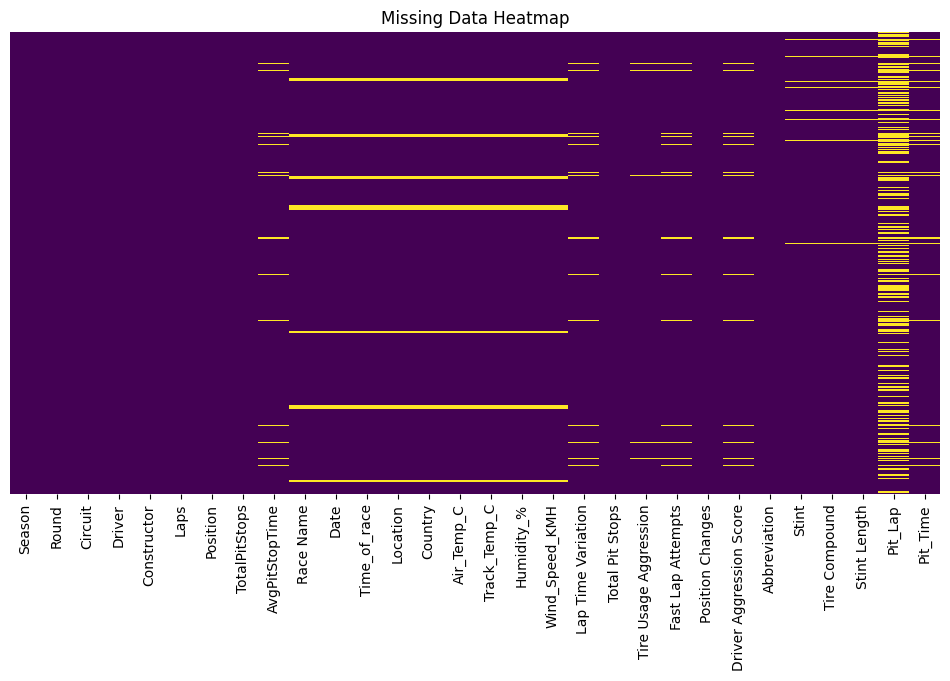

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(race_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

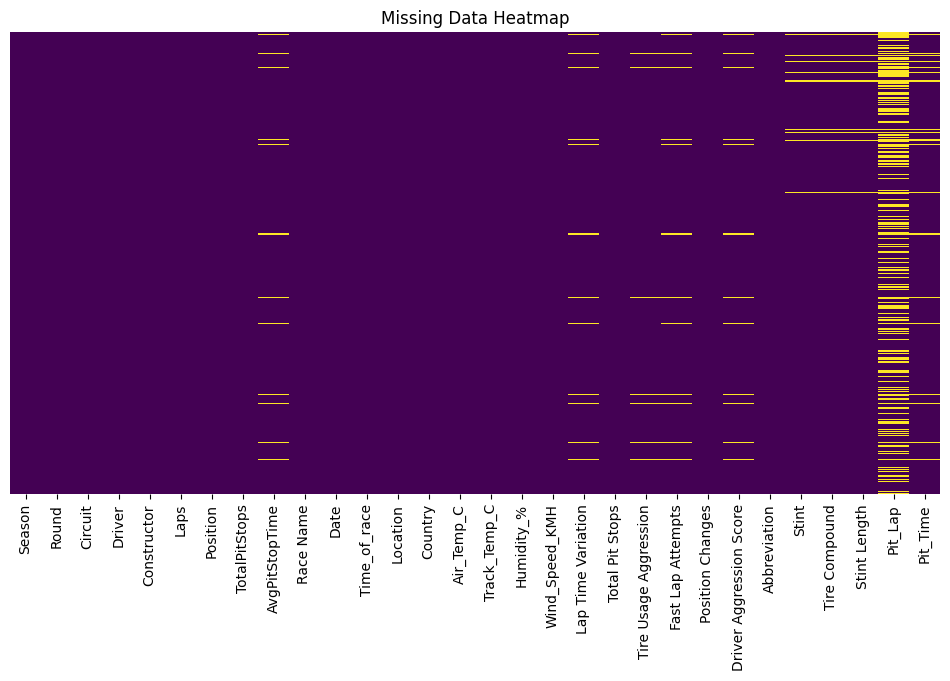

In [ ]:
race_data = race_data[race_data['Race Name'].notnull()]
plt.figure(figsize=(12, 6))
sns.heatmap(race_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
race_data.isnull().sum()

,0
Season,0
Round,0
Circuit,0
Driver,0
Constructor,0
Laps,0
Position,0
TotalPitStops,0
AvgPitStopTime,176
Race Name,0


In [ ]:
race_data['Fast Lap Attempts'] = race_data['Fast Lap Attempts'].fillna(0)

In [ ]:
race_data['DNF_CrashOrDQ'] = race_data['AvgPitStopTime'].isnull().astype(int)

In [ ]:
race_data['Tire Usage Aggression'] = race_data['Tire Usage Aggression'].fillna(
    race_data['Tire Usage Aggression'].median())


In [ ]:
race_data.dtypes

,0
Season,int64
Round,int64
Circuit,object
Driver,object
Constructor,object
Laps,int64
Position,int64
TotalPitStops,int64
AvgPitStopTime,float64
Race Name,object


In [ ]:
race_data['Date'] = pd.to_datetime(race_data['Date'], format='mixed', dayfirst=True)

In [ ]:
race_data['Race_Year'] = race_data['Date'].dt.year
race_data['Race_Month'] = race_data['Date'].dt.month
race_data['Race_DayOfWeek'] = race_data['Date'].dt.day_name()

# Data Exploration

In [ ]:
print(race_data.dtypes)
print(race_data.describe())
print(race_data.info())


Season                              int64
Round                               int64
Circuit                            object
Driver                             object
Constructor                        object
Laps                                int64
Position                            int64
TotalPitStops                       int64
AvgPitStopTime                    float64
Race Name                          object
Date                       datetime64[ns]
Time_of_race                       object
Location                           object
Country                            object
Air_Temp_C                        float64
Track_Temp_C                      float64
Humidity_%                        float64
Wind_Speed_KMH                    float64
Lap Time Variation                float64
Total Pit Stops                   float64
Tire Usage Aggression             float64
Fast Lap Attempts                 float64
Position Changes                  float64
Driver Aggression Score           

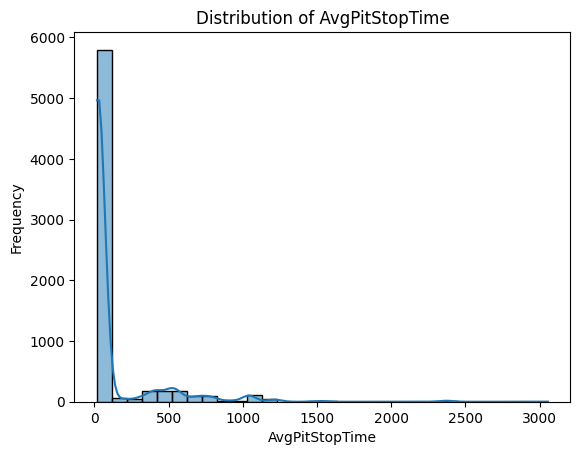

In [ ]:
sns.histplot(race_data['AvgPitStopTime'], bins=30, kde=True)
plt.title('Distribution of AvgPitStopTime')
plt.xlabel('AvgPitStopTime')
plt.ylabel('Frequency')
plt.show()

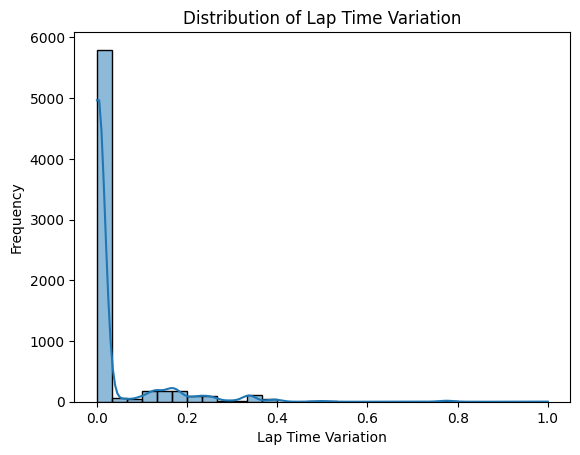

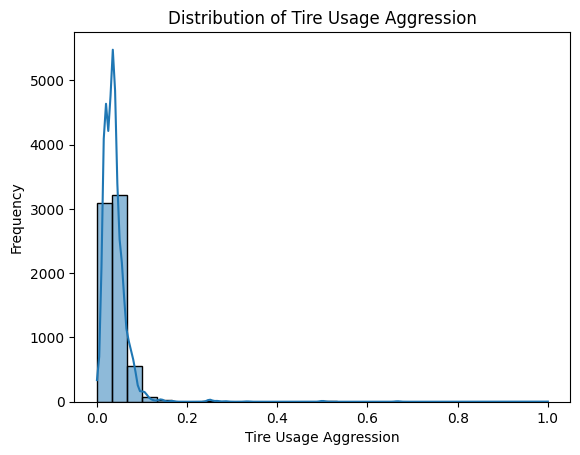

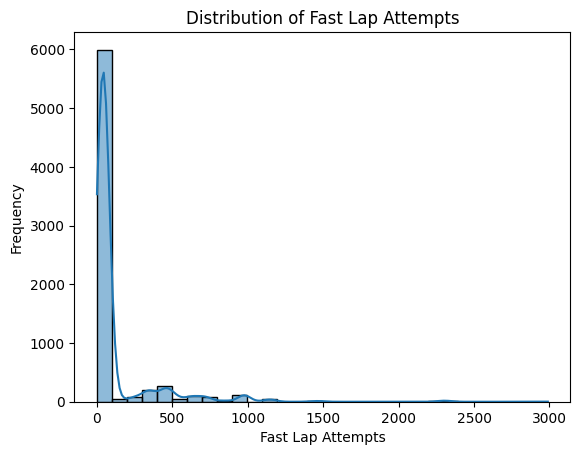

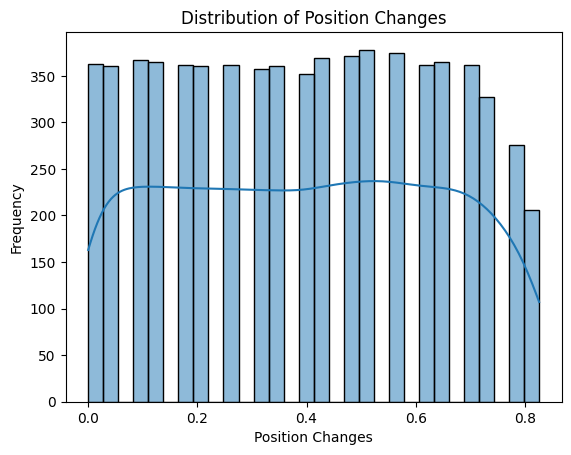

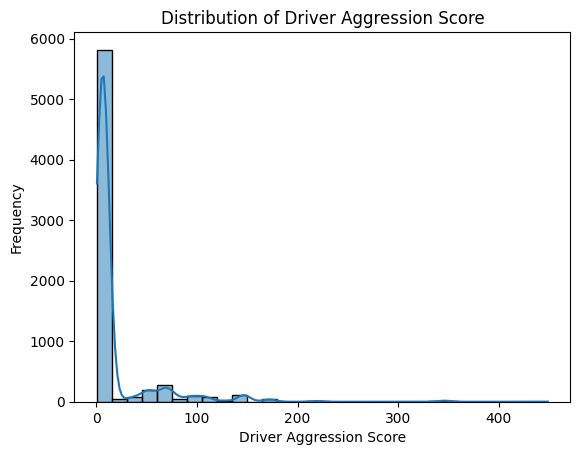

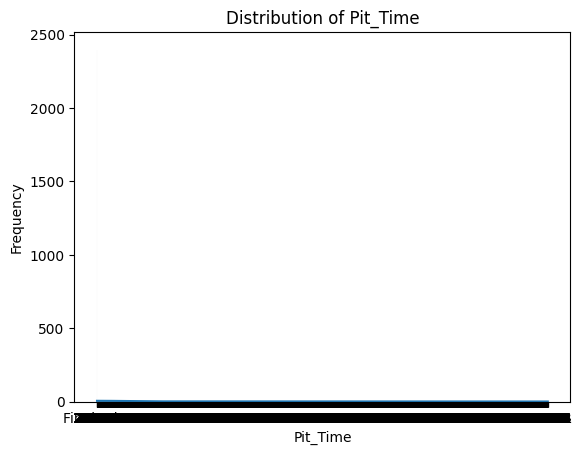

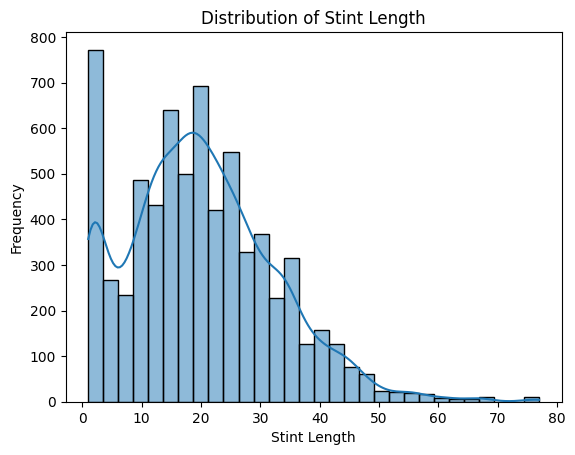

In [ ]:
for col in ['Lap Time Variation', 'Tire Usage Aggression', 'Fast Lap Attempts',
            'Position Changes', 'Driver Aggression Score', 'Pit_Time', 'Stint Length']:
    sns.histplot(race_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

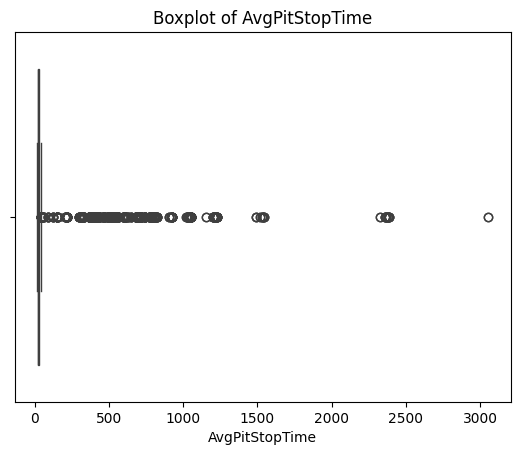

In [ ]:
sns.boxplot(x=race_data['AvgPitStopTime'])
plt.title('Boxplot of AvgPitStopTime')
plt.show()

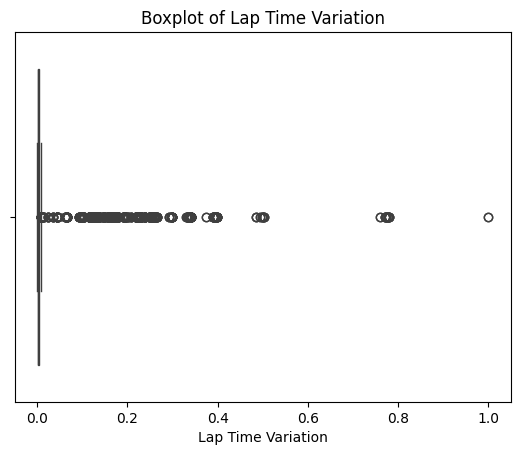

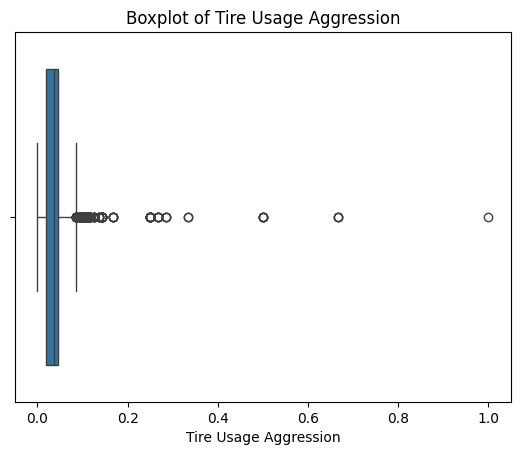

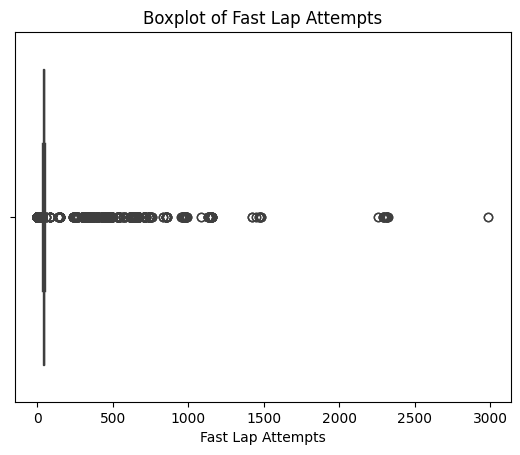

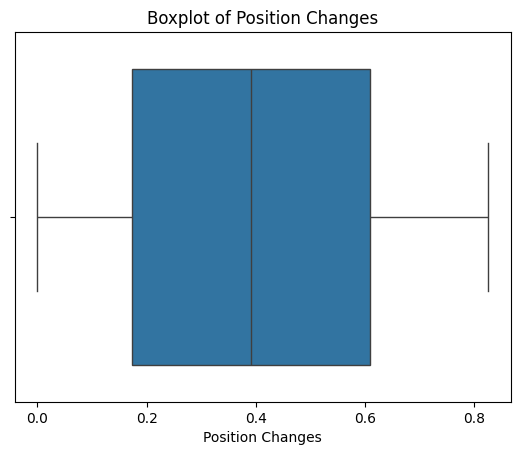

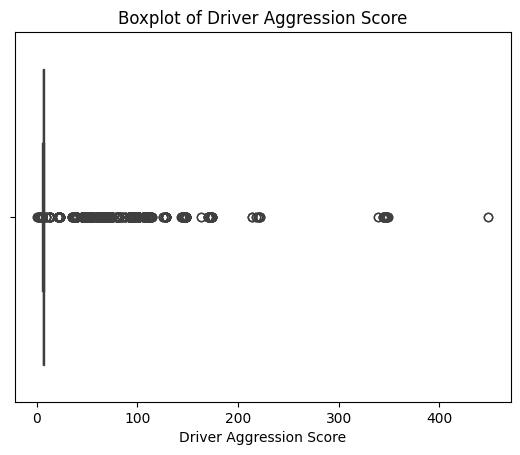

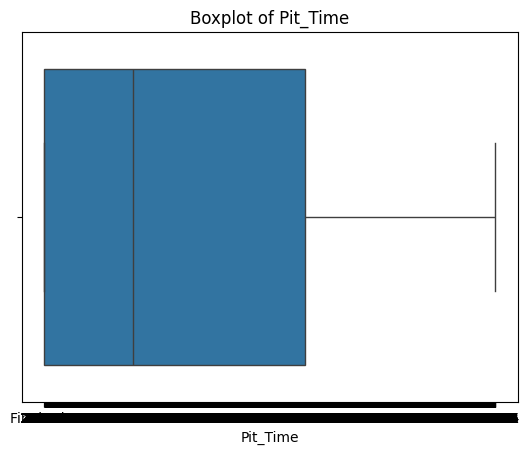

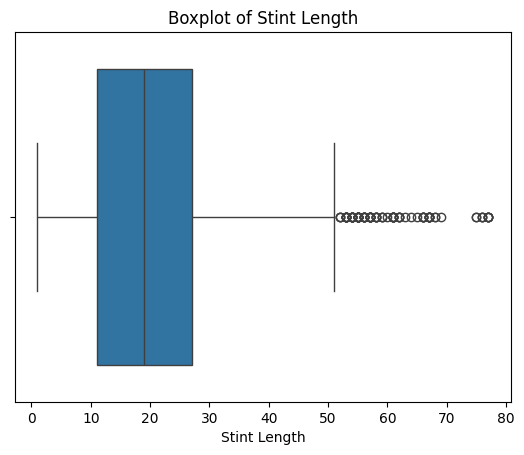

In [ ]:
for col in ['Lap Time Variation', 'Tire Usage Aggression', 'Fast Lap Attempts',
            'Position Changes', 'Driver Aggression Score', 'Pit_Time', 'Stint Length']:
    sns.boxplot(x=race_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

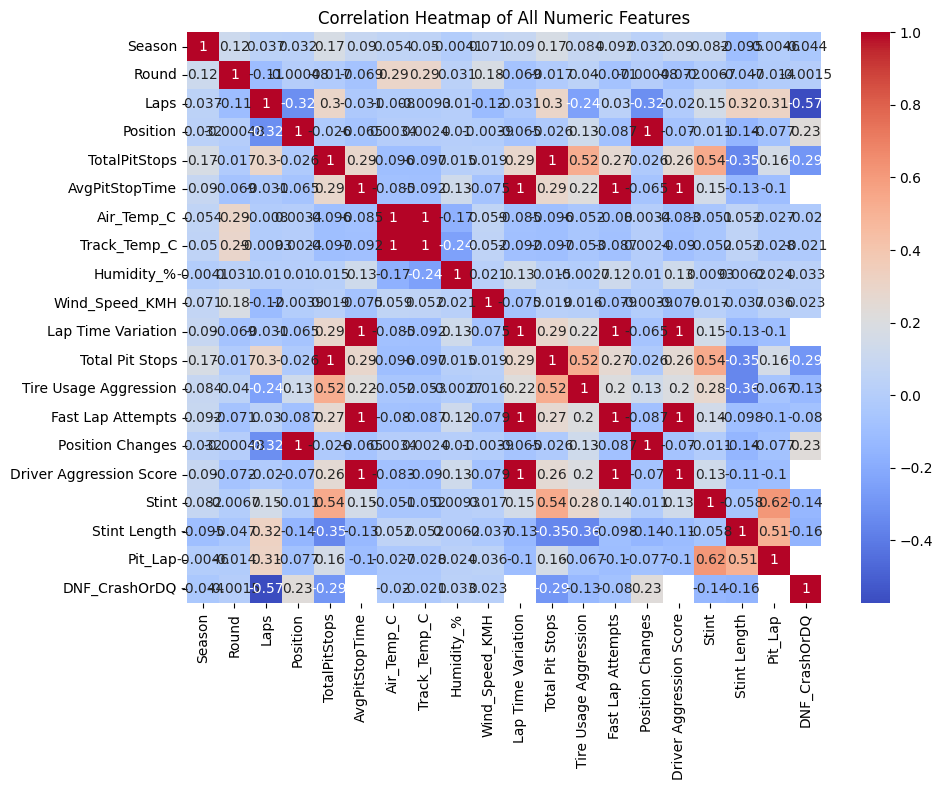

In [ ]:
numeric_cols = race_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(race_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of All Numeric Features")
plt.tight_layout()
plt.show()

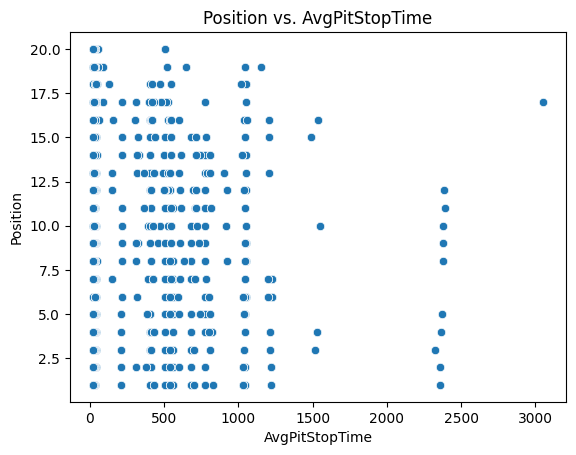

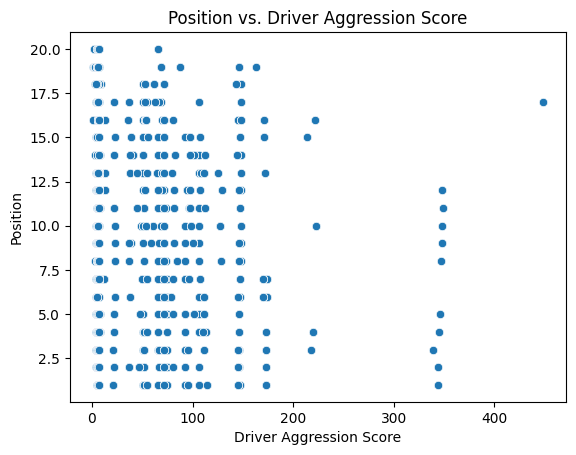

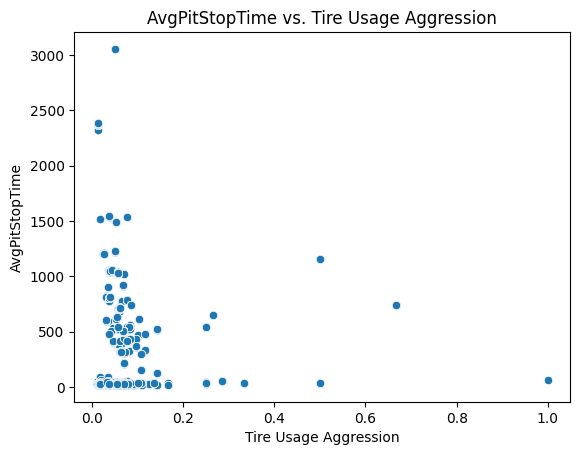

In [ ]:
# AvgPitStopTime vs Position
sns.scatterplot(data=race_data, x='AvgPitStopTime', y='Position')
plt.title('Position vs. AvgPitStopTime')
plt.show()

# Driver Aggression Score vs Position
sns.scatterplot(data=race_data, x='Driver Aggression Score', y='Position')
plt.title('Position vs. Driver Aggression Score')
plt.show()

# Tire Usage Aggression vs AvgPitStopTime
sns.scatterplot(data=race_data, x='Tire Usage Aggression', y='AvgPitStopTime')
plt.title('AvgPitStopTime vs. Tire Usage Aggression')
plt.show()

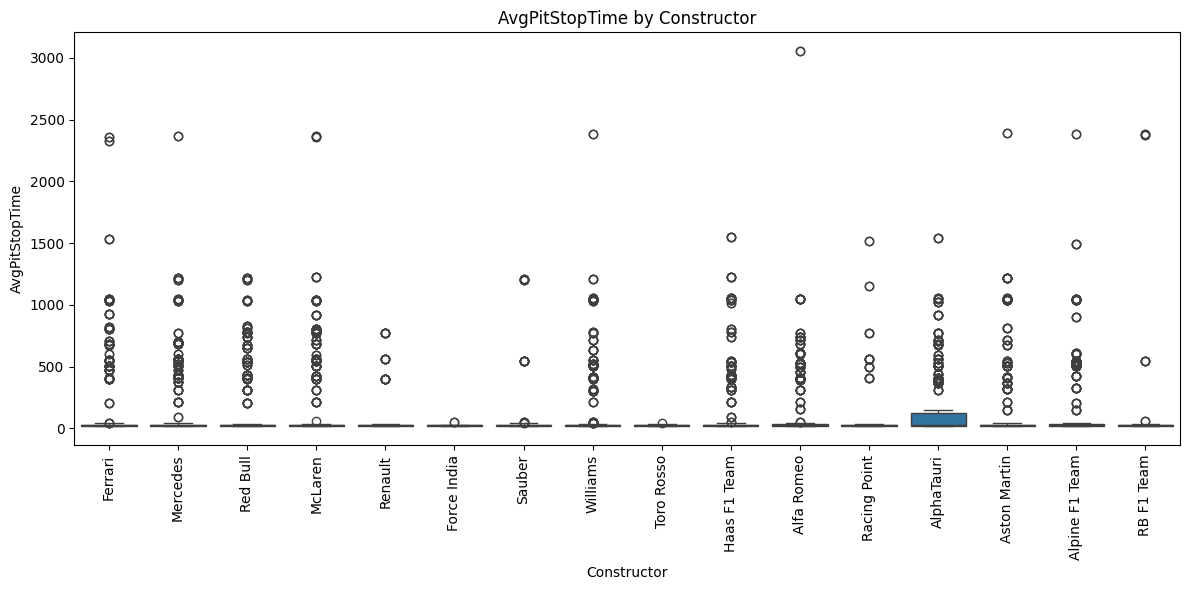

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Constructor', y='AvgPitStopTime', data=race_data)
plt.xticks(rotation=90)
plt.title('AvgPitStopTime by Constructor')
plt.tight_layout()
plt.show()

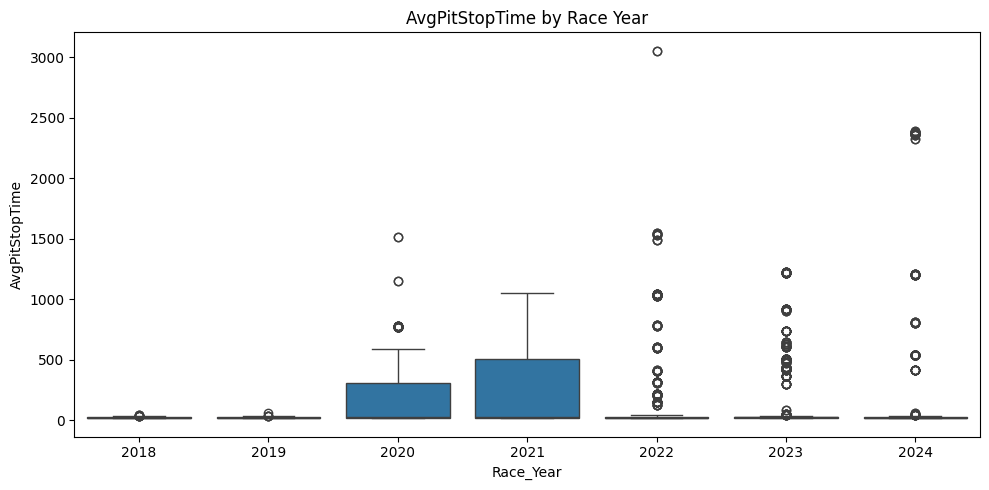

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Race_Year', y='AvgPitStopTime', data=race_data)
plt.title('AvgPitStopTime by Race Year')
plt.tight_layout()
plt.show()

In [ ]:
lap_data = race_data[race_data['AvgPitStopTime'].notnull()]

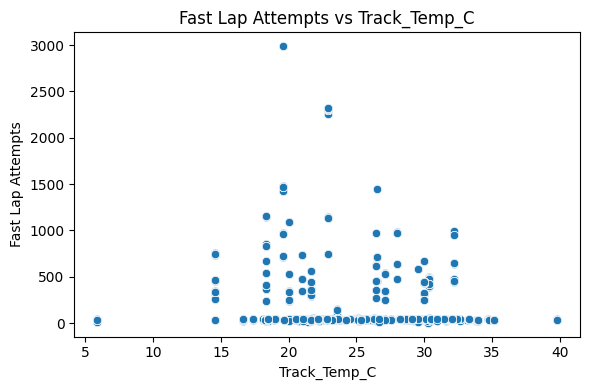

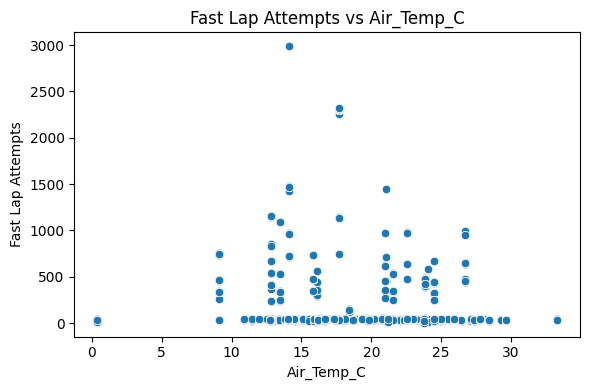

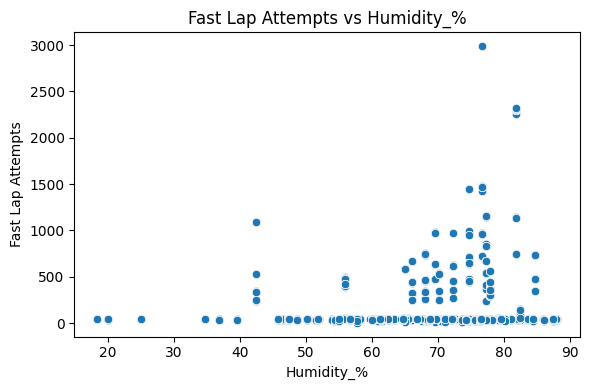

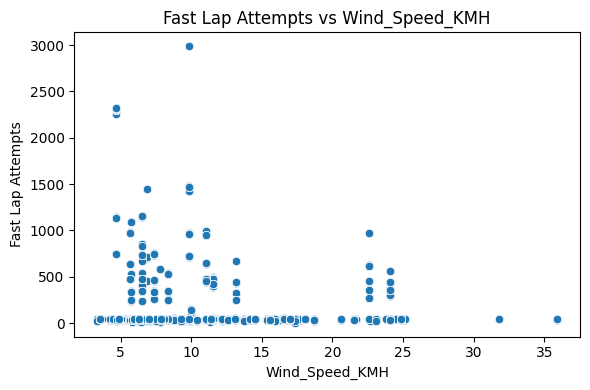

In [ ]:
for col in ['Track_Temp_C', 'Air_Temp_C', 'Humidity_%', 'Wind_Speed_KMH']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=lap_data, x=col, y='Fast Lap Attempts')
    plt.title(f'Fast Lap Attempts vs {col}')
    plt.tight_layout()
    plt.show()

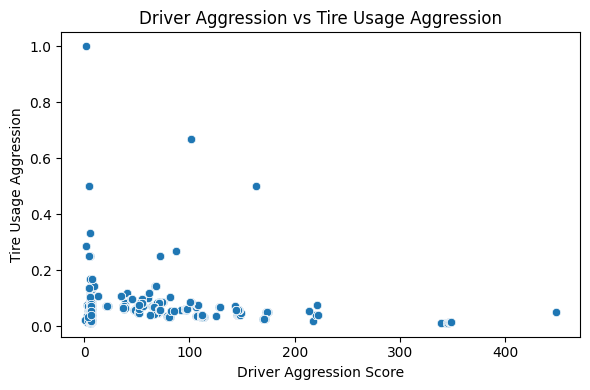

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=lap_data, x='Driver Aggression Score', y='Tire Usage Aggression')
plt.title('Driver Aggression vs Tire Usage Aggression')
plt.tight_layout()
plt.show()

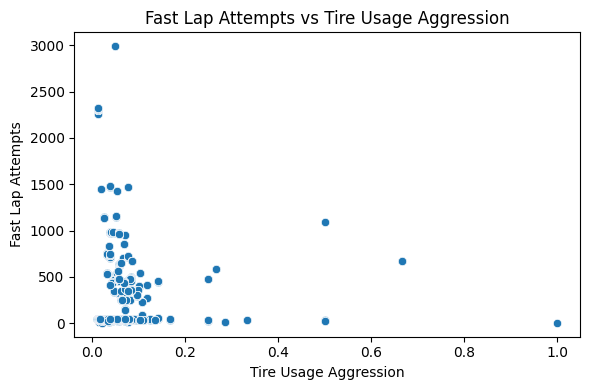

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=lap_data, x='Tire Usage Aggression', y='Fast Lap Attempts')
plt.title('Fast Lap Attempts vs Tire Usage Aggression')
plt.tight_layout()
plt.show()

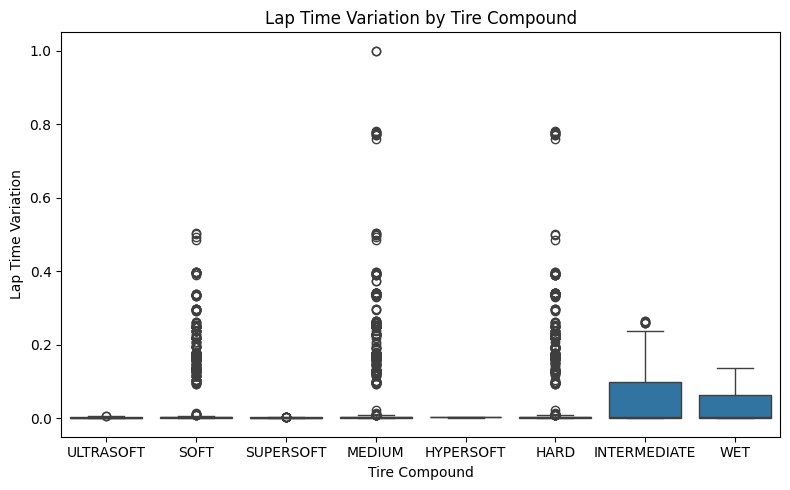

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=lap_data, x='Tire Compound', y='Lap Time Variation')
plt.title('Lap Time Variation by Tire Compound')
plt.tight_layout()
plt.show()

<ipython-input-29-1108dd96ee2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_data['Track_Temp_Bin'] = pd.cut(lap_data['Track_Temp_C'], bins=5)


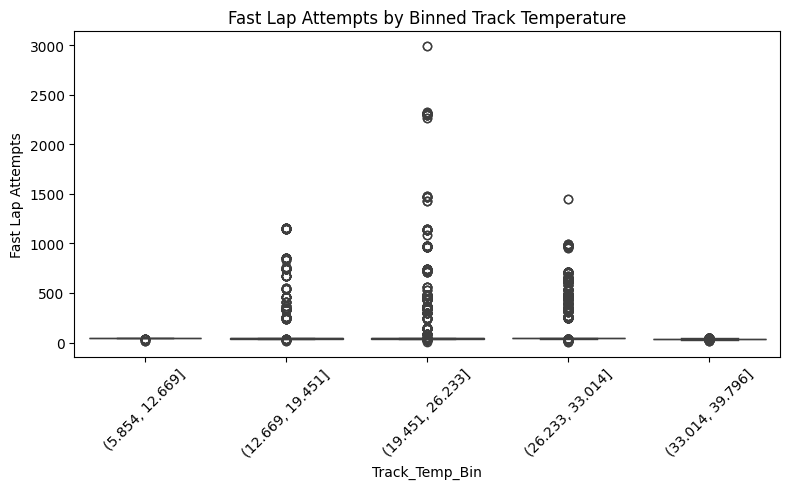

In [ ]:
lap_data['Track_Temp_Bin'] = pd.cut(lap_data['Track_Temp_C'], bins=5)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Track_Temp_Bin', y='Fast Lap Attempts', data=lap_data)
plt.xticks(rotation=45)
plt.title('Fast Lap Attempts by Binned Track Temperature')
plt.tight_layout()
plt.show()

## Data Exploration Summary
The dataset contains lots of detail across race-level, driver-level, and environmental aspects for each race. After removing the disqualified/ crashed racers that had an average pit stop time missing, and focusing on the drivers who completed the race, led to more accurate modeling. The weather data, including track_temp_c, air_temp_C, humidity%, and wind_spreed_KMH shows meaningful variation which will be useful for modeling lap performance under different conditions. The scatter plots between fast lap attempts and weather show there are more fast lap attempts when the track temperature is warm, most likely due to an improved tire grip from the heat. The mid-range temps had the highest number of fast lap attempts compared to the far cold or hot track temps. There is a positive correlation between more aggressive drivers and higher tire usage, which validates the idea that driving style will impact tire wear. The plots also show that a higher tire aggression correlates with higher fast lap attempts. Overall, tire strategy and performance show that softer tire compounds have a wider variation in lap times, which suggests they are more sensitive to various conditions and degrade quickly. The harder tires have a more constant performance but may lack the peak speed needed for the fastest lap.  

# Data Preperation

In [ ]:
print(race_data['Pit_Time'].unique())

['21.787' 'Final Stint' '21.821' ... '32.317' '41.144' '24.941']


In [ ]:
race_data['Pit_Time'] = race_data['Pit_Time'].replace(['--', 'N/A', 'Final Stint'], np.nan)

In [ ]:
race_data['Pit_Time'] = pd.to_numeric(race_data['Pit_Time'], errors='coerce')

In [ ]:
lap_data = lap_data[lap_data['Lap Time Variation'].notnull()]
feature_cols = [
    'Track_Temp_C', 'Air_Temp_C', 'Humidity_%', 'Wind_Speed_KMH',
    'Driver Aggression Score', 'Tire Usage Aggression', 'Fast Lap Attempts',
    'Stint Length', 'Race_Year', 'Constructor'  # Constructor will be encoded
]
target_col = 'Lap Time Variation'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lap_data['Constructor_Encoded'] = le.fit_transform(lap_data['Constructor'])
feature_cols.remove('Constructor')
feature_cols.append('Constructor_Encoded')
lap_data = pd.get_dummies(lap_data, columns=['Tire Compound'], drop_first=True)
feature_cols += [col for col in lap_data.columns if col.startswith('Tire Compound_')]


In [ ]:
from sklearn.model_selection import train_test_split

X = lap_data[feature_cols]
y = lap_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Only scale for linear models
numeric_features = [
    'Track_Temp_C', 'Air_Temp_C', 'Humidity_%', 'Wind_Speed_KMH',
    'Driver Aggression Score', 'Tire Usage Aggression', 'Fast Lap Attempts',
    'Stint Length', 'Race_Year'
]

# Create scaled version of X for linear models
X_scaled = X.copy()
scaler = StandardScaler()
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])

## Data Preperation Summary
While previously cleaning some of the missing values in the data 373 rows were dropped because they were missing all race-level data. Drivers who did not finish the race having a avg pit stop time as null were removed. The date column was converted to datetime and broken into month year and day of week. The track temperature was binned into 5 bins for comparison later on.
In this section, extracting key features related to race day conditions, driver behavior, and strategy helps make the model predictive and interpretable. Categorical columns like Constructor were label-encoded, and Tire Compound was one-hot encoded to ensure model compatibility. The numeric data is scaled for Linear/Ridge/Lasso models and will use the X_scaled variables, while the random forest and XGBoost regression models will use the original X unscaled data.


# Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

## Model Selection Summary
The first model is a linear regression model, which will be the baseline foundational model, assuming a linear relationship between independent variables such as driver aggression, weather conditions, and the dependent variable, lap time variation. The linear regression model will use the X_scaled data. The next model is the ridge regression model, which shrinks all coefficients close to 0 but keeps them in the model. The lasso regression model shrinks some coefficients to 0, which helps with feature selection. Both the lasso and ridge regression models will add regularization and prevent overfitting; both will use scaled data. The tree-based model used is the Random Forest Regressor, which builds multiple trees using bootstrapped data and random feature selection. This will be essential to detecting non-linear patterns and will use the unscaled data. The random forest regressor is also useful for structured data and is robust with outliers. The final model is the XGBoost Regressor, which is a high-performance gradient boosting framework that builds models sequentially, improving each one by correcting the errors in the previous. It is more regularized than Random Forest and is fast and accurate with structured data. The model has high predictive power with tuning and built-in regularization. The XGBoost model will use unscaled data as well.

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

X_scaled = X_scaled.dropna()
X = X.loc[X_scaled.index]
y = y.loc[X_scaled.index]

# Train-test split for scaled models
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train-test split for unscaled models (same indices to ensure comparability)
X_train_raw, X_test_raw, _, _ = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train (on scaled features)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_preds = lr_model.predict(X_train_scaled)
lr_mse = mean_squared_error(y_train, lr_preds)
lr_r2 = r2_score(y_train, lr_preds)

print("Linear Regression Training Results:")
print(f"  - Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"  - R² Score: {lr_r2:.4f}")

Linear Regression Training Results:
  - Mean Squared Error (MSE): 0.0000
  - R² Score: 0.9960


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Set up grid of alpha values
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search with 5-fold CV
ridge_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_search.fit(X_train_scaled, y_train)

# Use best model
ridge_best = ridge_search.best_estimator_

# Training predictions and metrics
ridge_preds = ridge_best.predict(X_train_scaled)
ridge_mse = mean_squared_error(y_train, ridge_preds)
ridge_r2 = r2_score(y_train, ridge_preds)

print("Ridge Regression (Tuned) Training Results:")
print(f"  - Best alpha: {ridge_search.best_params_['alpha']}")
print(f"  - Mean Squared Error (MSE): {ridge_mse:.4f}")
print(f"  - R² Score: {ridge_r2:.4f}")

Ridge Regression (Tuned) Training Results:
  - Best alpha: 0.01
  - Mean Squared Error (MSE): 0.0000
  - R² Score: 0.9958


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define alpha values to test
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Grid search with cross-validation
lasso_search = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='r2')
lasso_search.fit(X_train_scaled, y_train)

# Best model from grid search
lasso_best = lasso_search.best_estimator_

# Training predictions and metrics
lasso_preds = lasso_best.predict(X_train_scaled)
lasso_mse = mean_squared_error(y_train, lasso_preds)
lasso_r2 = r2_score(y_train, lasso_preds)

print("Lasso Regression (Tuned) Training Results:")
print(f"  - Best alpha: {lasso_search.best_params_['alpha']}")
print(f"  - Mean Squared Error (MSE): {lasso_mse:.4f}")
print(f"  - R² Score: {lasso_r2:.4f}")

Lasso Regression (Tuned) Training Results:
  - Best alpha: 0.0001
  - Mean Squared Error (MSE): 0.0000
  - R² Score: 0.9955


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Define hyperparameter distribution
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Randomized search
rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=10,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit search on unscaled training data
rf_search.fit(X_train_raw, y_train)

# Get best model and evaluate on training data
rf_best = rf_search.best_estimator_
rf_preds = rf_best.predict(X_train_raw)
rf_mse = mean_squared_error(y_train, rf_preds)
rf_r2 = r2_score(y_train, rf_preds)

print("Random Forest Regressor (Tuned) Training Results:")
print("  - Best Parameters:", rf_search.best_params_)
print(f"  - Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"  - R² Score: {rf_r2:.4f}")

Random Forest Regressor (Tuned) Training Results:
  - Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
  - Mean Squared Error (MSE): 0.0000
  - R² Score: 0.9995


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint

# Define hyperparameter distribution
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),   # values between 0.01 and 0.21
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),        # values between 0.6 and 1.0
    'colsample_bytree': uniform(0.6, 0.4), # values between 0.6 and 1.0
    'gamma': uniform(0, 5)
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_params,
    n_iter=10,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit on raw training data (no scaling needed)
xgb_search.fit(X_train_raw, y_train)

# Best model from search
xgb_best = xgb_search.best_estimator_

# Evaluate on training data
xgb_preds = xgb_best.predict(X_train_raw)
xgb_mse = mean_squared_error(y_train, xgb_preds)
xgb_r2 = r2_score(y_train, xgb_preds)

print("XGBoost Regressor (Tuned) Training Results:")
print("  - Best Parameters:", xgb_search.best_params_)
print(f"  - Mean Squared Error (MSE): {xgb_mse:.4f}")
print(f"  - R² Score: {xgb_r2:.4f}")

XGBoost Regressor (Tuned) Training Results:
  - Best Parameters: {'colsample_bytree': np.float64(0.8446612641953124), 'gamma': np.float64(0.03533152609858703), 'learning_rate': np.float64(0.014612485008283152), 'max_depth': 5, 'n_estimators': 300, 'subsample': np.float64(0.7599443886861021)}
  - Mean Squared Error (MSE): 0.0000
  - R² Score: 0.9942


## Model Training Summary
The data set was split into training and testing sets, 80% training, 20% testing. Then further split into scaled data for linear models (Linear, Ridge, Lasso), and unscaled data for tree-based models (Random Forest, XGBoost).


The linear regression model has no tuned parameters and is used as a benchmark for comparison. The training model shows a strong linear relationship with weather, drive behavior, and tire strategy, which suggests the problem may have a strong linear component. Its training results were Linear Regression Training Results:
•	Mean Squared Error (MSE): 0.0000
•	R² Score: 0.9960


The Ridge regression model was tuned using a 5-fold CV where alpha = [0.01, 0.1, 1, 10, 100]. The best alpha found was 0.1. The Ridge Regression (Tuned) Training Results:
•	Best alpha: 0.01
•	Mean Squared Error (MSE): 0.0000
•	R² Score: 0.9958


The Lasso Regression model was tuned using cross validation as well and tested alphas 0.0001, 0.001, 0.01, 0.1, 1, 10. The best alpha determined was 0.0001. Lasso Regression (Tuned) Training Results:
•	Best alpha: 0.0001
•	Mean Squared Error (MSE): 0.0000
•	R² Score: 0.9955


The Ridge slightly outperformed the Lasso model, showing most of the features are relevant and shouldn't be aggressively zeroed out.


The Random Forest Regressor was tuned using a randomized search cv over n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features. The near-perfect performance of the model shows it has fully memorized the training data and captured the nonlinear relationships and interactions well. The high fit level could also indicate overfitting, which will be seen after validating the model against the unseen data. Random Forest Regressor (Tuned) Training Results:
•	Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
•	Mean Squared Error (MSE): 0.0000
•	R² Score: 0.9995


The XGBoost Regressor was tuned using a randomized search cv as well over learning_race, max_depth, n_estimators, subsample, colsample_bytree, and gamma. The small learning rate and moderate maxdepth show the model is being slightly cautious in order to reduce the risk of overfitting.

XGBoost Regressor (Tuned) Training Results:
•	Best Parameters: {'colsample_bytree': np.float64(0.8446612641953124), 'gamma': np.float64(0.03533152609858703), 'learning_rate': np.float64(0.014612485008283152), 'max_depth': 5, 'n_estimators': 300, 'subsample': np.float64(0.7599443886861021)}
•	Mean Squared Error (MSE): 0.0000
•	R² Score: 0.9942



# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
lr_test_preds = lr_model.predict(X_test_scaled)

# Compute metrics
lr_test_mse = mean_squared_error(y_test, lr_test_preds)
lr_test_mae = mean_absolute_error(y_test, lr_test_preds)
lr_test_r2 = r2_score(y_test, lr_test_preds)

# Print results
print("Linear Regression Test Set Evaluation:")
print(f"  - Mean Squared Error (MSE): {lr_test_mse:.4f}")
print(f"  - Mean Absolute Error (MAE): {lr_test_mae:.4f}")
print(f"  - R² Score: {lr_test_r2:.4f}")

Linear Regression Test Set Evaluation:
  - Mean Squared Error (MSE): 0.0000
  - Mean Absolute Error (MAE): 0.0038
  - R² Score: 0.9958


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set using the tuned Ridge model
ridge_test_preds = ridge_best.predict(X_test_scaled)

# Compute evaluation metrics
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_preds)
ridge_test_r2 = r2_score(y_test, ridge_test_preds)

# Print results
print("Ridge Regression Test Set Evaluation:")
print(f"  - Mean Squared Error (MSE): {ridge_test_mse:.4f}")
print(f"  - Mean Absolute Error (MAE): {ridge_test_mae:.4f}")
print(f"  - R² Score: {ridge_test_r2:.4f}")

Ridge Regression Test Set Evaluation:
  - Mean Squared Error (MSE): 0.0000
  - Mean Absolute Error (MAE): 0.0039
  - R² Score: 0.9956


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set using the tuned Lasso model
lasso_test_preds = lasso_best.predict(X_test_scaled)

# Compute evaluation metrics
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_preds)
lasso_test_r2 = r2_score(y_test, lasso_test_preds)

# Print results
print("Lasso Regression Test Set Evaluation:")
print(f"  - Mean Squared Error (MSE): {lasso_test_mse:.4f}")
print(f"  - Mean Absolute Error (MAE): {lasso_test_mae:.4f}")
print(f"  - R² Score: {lasso_test_r2:.4f}")

Lasso Regression Test Set Evaluation:
  - Mean Squared Error (MSE): 0.0000
  - Mean Absolute Error (MAE): 0.0040
  - R² Score: 0.9954


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set using the tuned Random Forest model
rf_test_preds = rf_best.predict(X_test_raw)

# Compute evaluation metrics
rf_test_mse = mean_squared_error(y_test, rf_test_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

# Print results
print("Random Forest Regressor Test Set Evaluation:")
print(f"  - Mean Squared Error (MSE): {rf_test_mse:.4f}")
print(f"  - Mean Absolute Error (MAE): {rf_test_mae:.4f}")
print(f"  - R² Score: {rf_test_r2:.4f}")

Random Forest Regressor Test Set Evaluation:
  - Mean Squared Error (MSE): 0.0000
  - Mean Absolute Error (MAE): 0.0001
  - R² Score: 0.9998


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set using the tuned XGBoost model
xgb_test_preds = xgb_best.predict(X_test_raw)

# Compute evaluation metrics
xgb_test_mse = mean_squared_error(y_test, xgb_test_preds)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)
xgb_test_r2 = r2_score(y_test, xgb_test_preds)

# Print results
print("XGBoost Regressor Test Set Evaluation:")
print(f"  - Mean Squared Error (MSE): {xgb_test_mse:.4f}")
print(f"  - Mean Absolute Error (MAE): {xgb_test_mae:.4f}")
print(f"  - R² Score: {xgb_test_r2:.4f}")

XGBoost Regressor Test Set Evaluation:
  - Mean Squared Error (MSE): 0.0000
  - Mean Absolute Error (MAE): 0.0026
  - R² Score: 0.9954


In [ ]:
model_names = ['Linear', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost']

r2_scores = [lr_test_r2, ridge_test_r2, lasso_test_r2, rf_test_r2, xgb_test_r2]
mse_scores = [lr_test_mse, ridge_test_mse, lasso_test_mse, rf_test_mse, xgb_test_mse]
mae_scores = [lr_test_mae, ridge_test_mae, lasso_test_mae, rf_test_mae, xgb_test_mae]

print("MSE Scores:", mse_scores)
print("MAE Scores:", mae_scores)

MSE Scores: [3.177901487399534e-05, 3.3211726779120194e-05, 3.443889219703803e-05, 1.462865759561187e-06, 3.446100022128063e-05]
MAE Scores: [0.0038476077647485005, 0.0038609740389949224, 0.003953878255094913, 9.183810247784295e-05, 0.0025807694214914595]


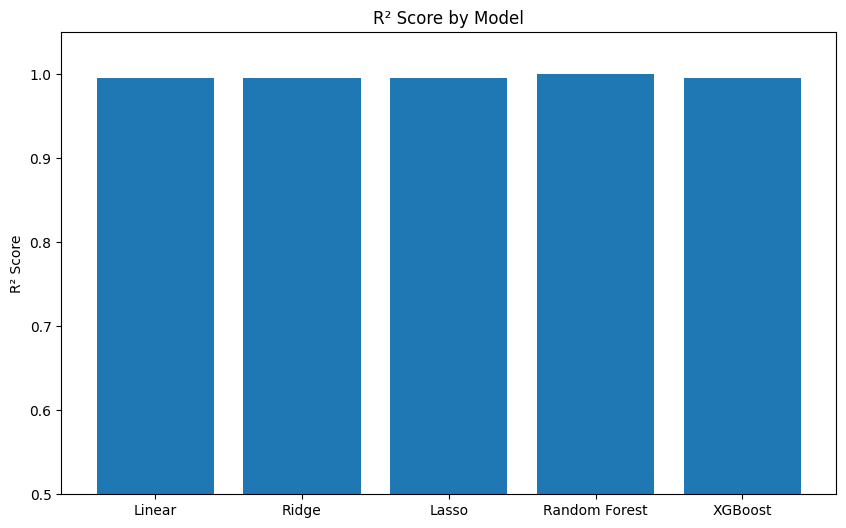

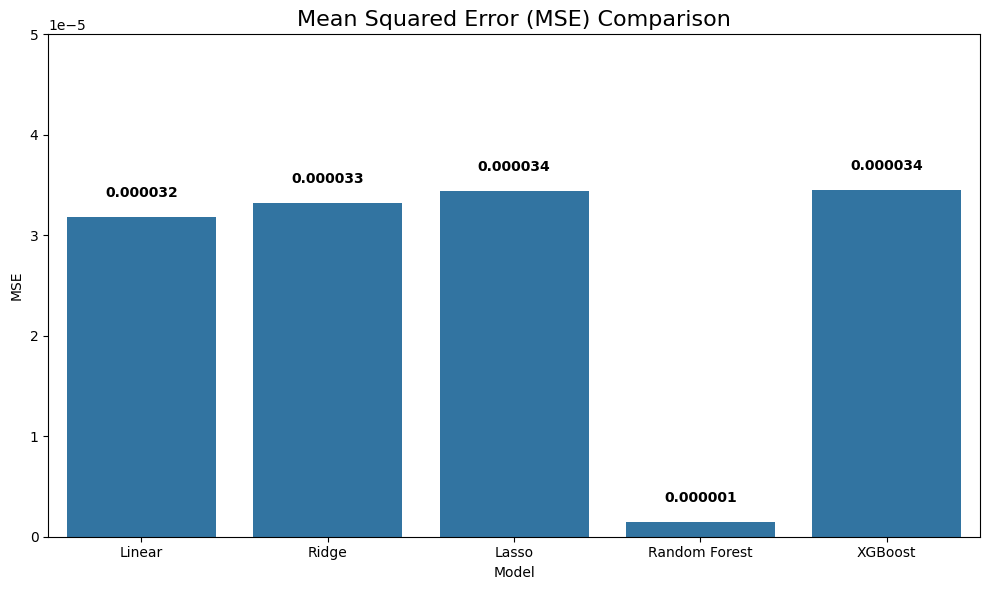

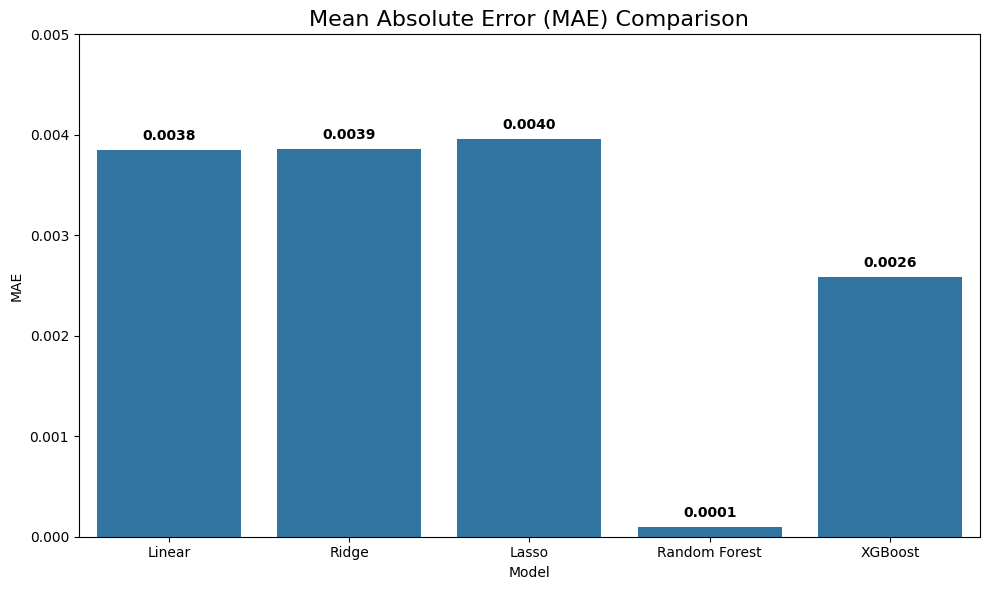

In [ ]:
import matplotlib.pyplot as plt

# Store results
model_names = ['Linear', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost']
r2_scores = [lr_test_r2, ridge_test_r2, lasso_test_r2, rf_test_r2, xgb_test_r2]
mse_scores = [lr_test_mse, ridge_test_mse, lasso_test_mse, rf_test_mse, xgb_test_mse]
mae_scores = [lr_test_mae, ridge_test_mae, lasso_test_mae, rf_test_mae, xgb_test_mae]

# Plot R²
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.ylim(.5, 1.05)
plt.title("R² Score by Model")
plt.ylabel("R² Score")
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_scores)
plt.title("Mean Squared Error (MSE) Comparison", fontsize=16)
plt.ylabel("MSE")
plt.xlabel("Model")
plt.ylim(0, 0.00005)
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.000002, f"{v:.6f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mae_scores)
plt.title("Mean Absolute Error (MAE) Comparison", fontsize=16)
plt.ylabel("MAE")
plt.xlabel("Model")
plt.ylim(0, 0.005)
for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.0001, f"{v:.4f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

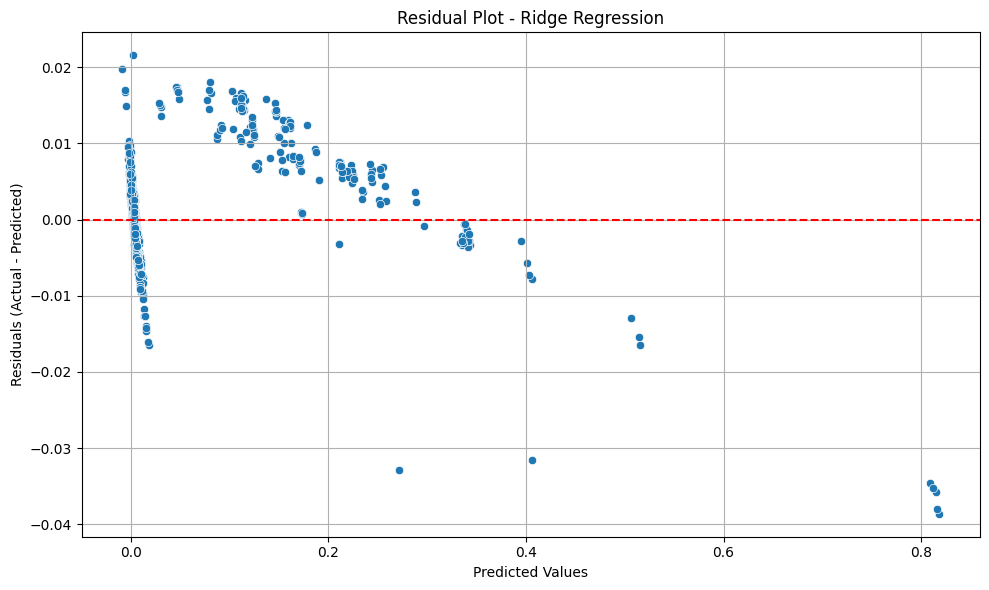

In [ ]:
import seaborn as sns

residuals = y_test - ridge_test_preds

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ridge_test_preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Ridge Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

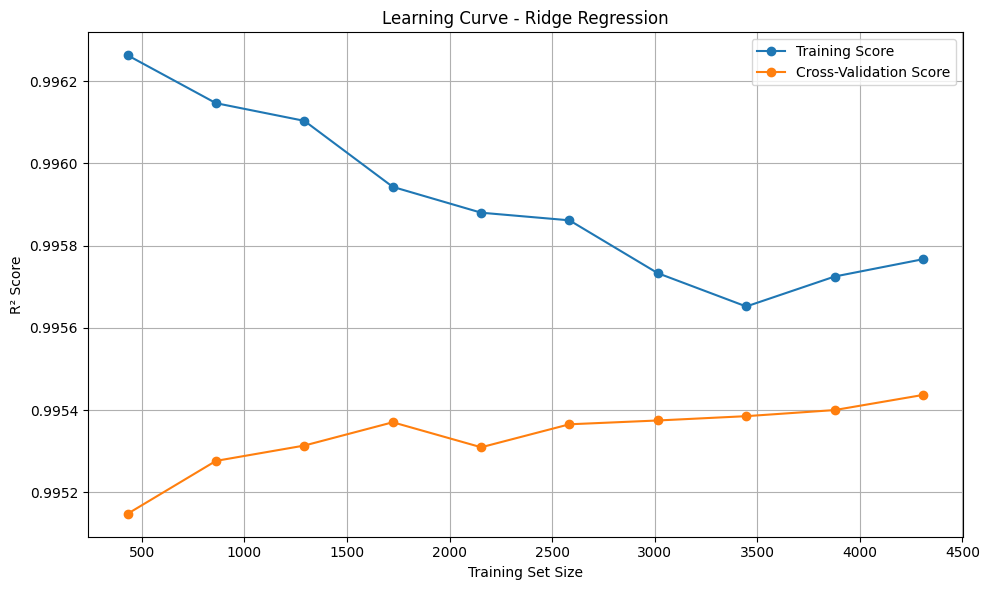

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    ridge_best, X_train_scaled, y_train,
    cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Cross-Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve - Ridge Regression")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

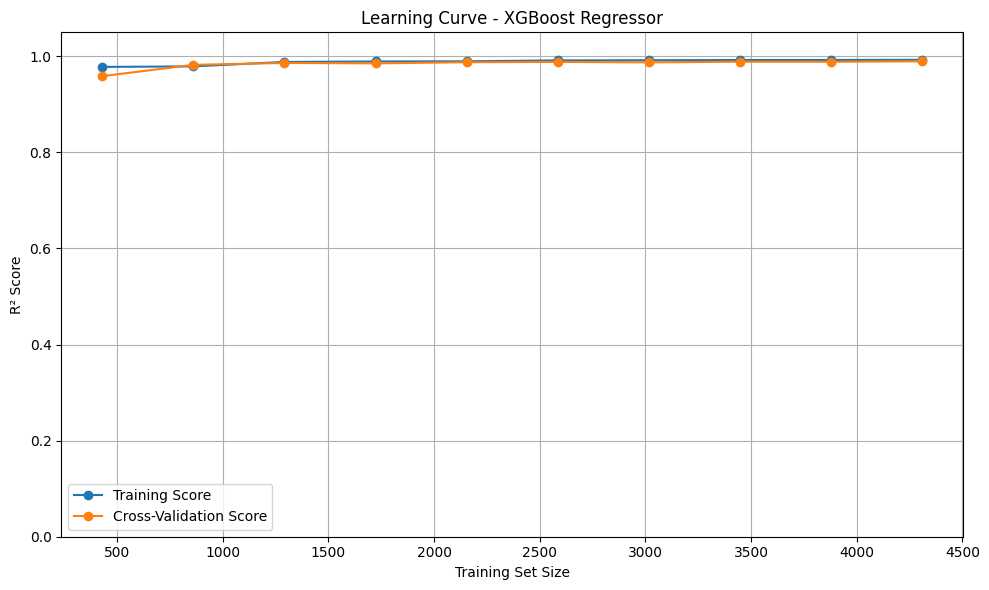

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Learning curve on training data for XGBoost
train_sizes, train_scores, val_scores = learning_curve(
    xgb_best, X_train_raw, y_train,
    cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate mean scores
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Cross-Validation Score")
plt.title("Learning Curve - XGBoost Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.ylim(0, 1.05)
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

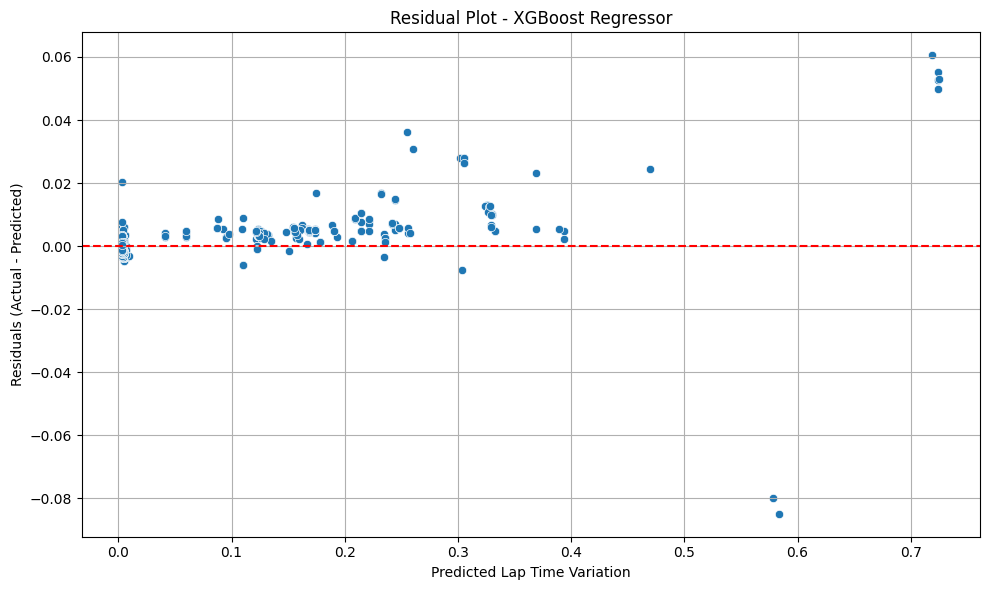

In [ ]:
import seaborn as sns

# Predict on test set
xgb_test_preds = xgb_best.predict(X_test_raw)

# Calculate residuals
residuals = y_test - xgb_test_preds

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=xgb_test_preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - XGBoost Regressor")
plt.xlabel("Predicted Lap Time Variation")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

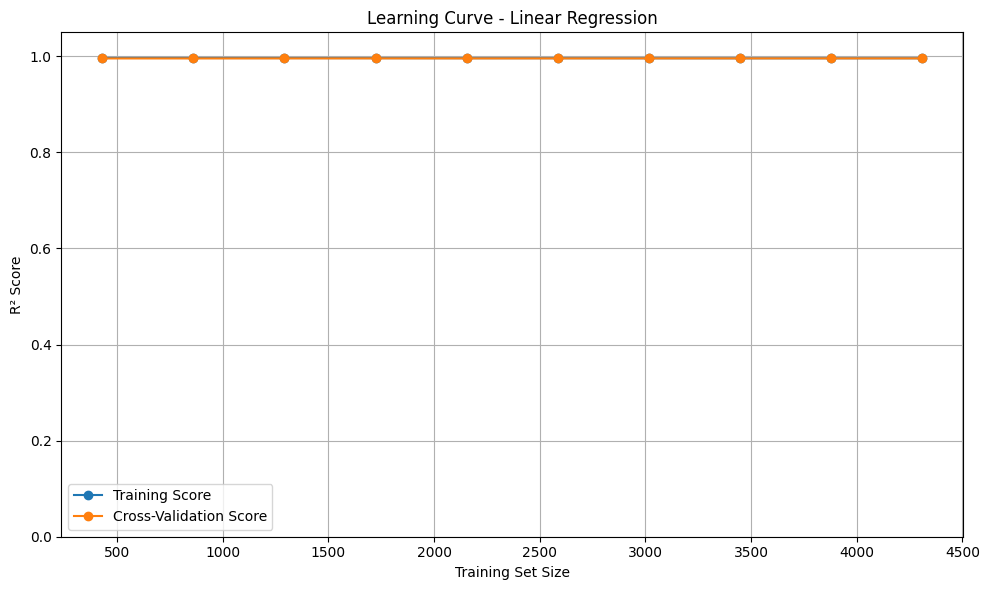

In [ ]:
# Linear Regression Learning Curve (on scaled data)
train_sizes, train_scores, val_scores = learning_curve(
    lr_model, X_train_scaled, y_train,
    cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Cross-Validation Score")
plt.title("Learning Curve - Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

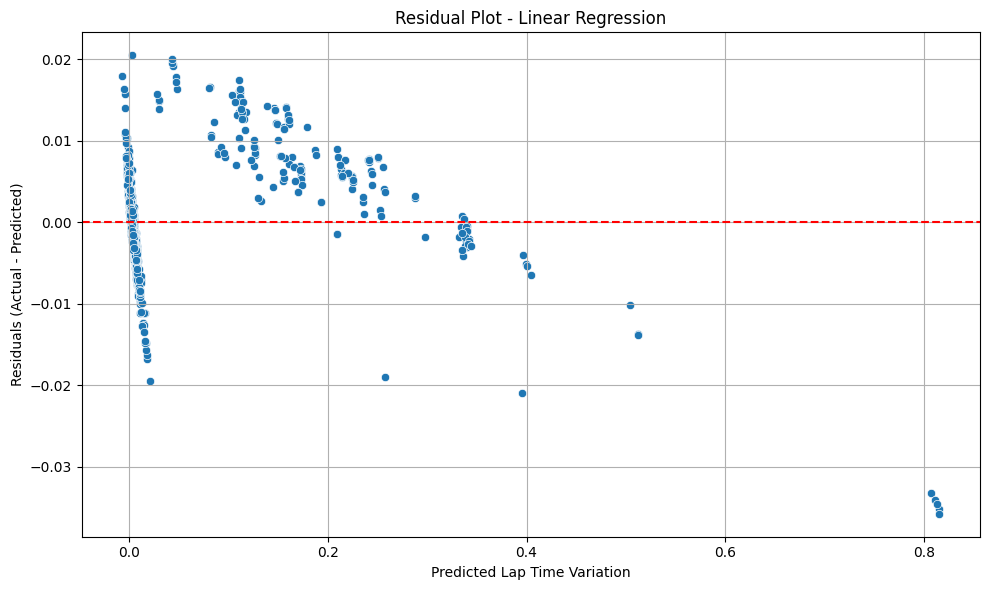

In [ ]:
lr_preds = lr_model.predict(X_test_scaled)
lr_residuals = y_test - lr_preds

plt.figure(figsize=(10, 6))
sns.scatterplot(x=lr_preds, y=lr_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Predicted Lap Time Variation")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

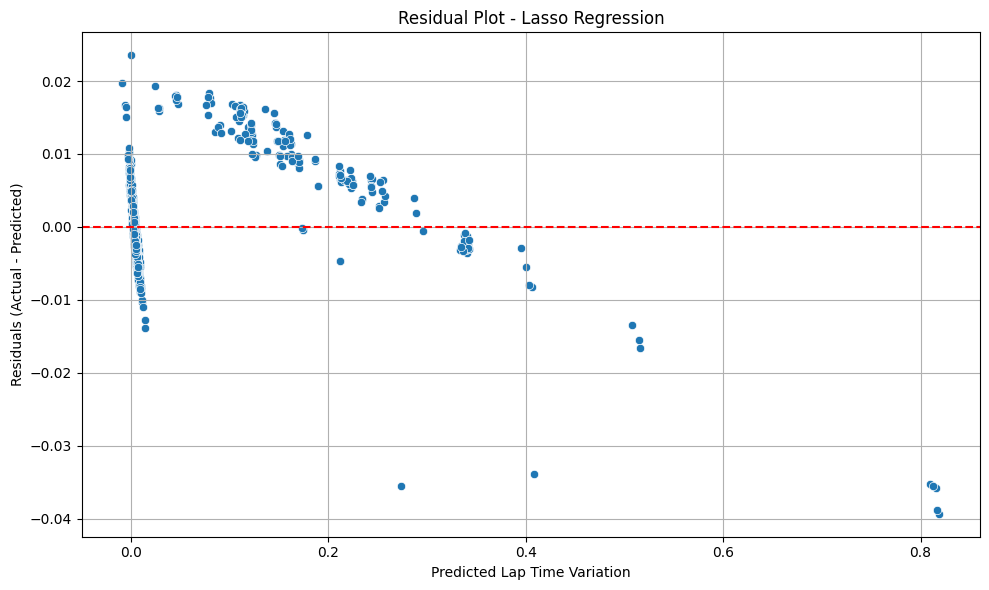

In [ ]:
import seaborn as sns

lasso_preds = lasso_best.predict(X_test_scaled)
lasso_residuals = y_test - lasso_preds

plt.figure(figsize=(10, 6))
sns.scatterplot(x=lasso_preds, y=lasso_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Lasso Regression")
plt.xlabel("Predicted Lap Time Variation")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

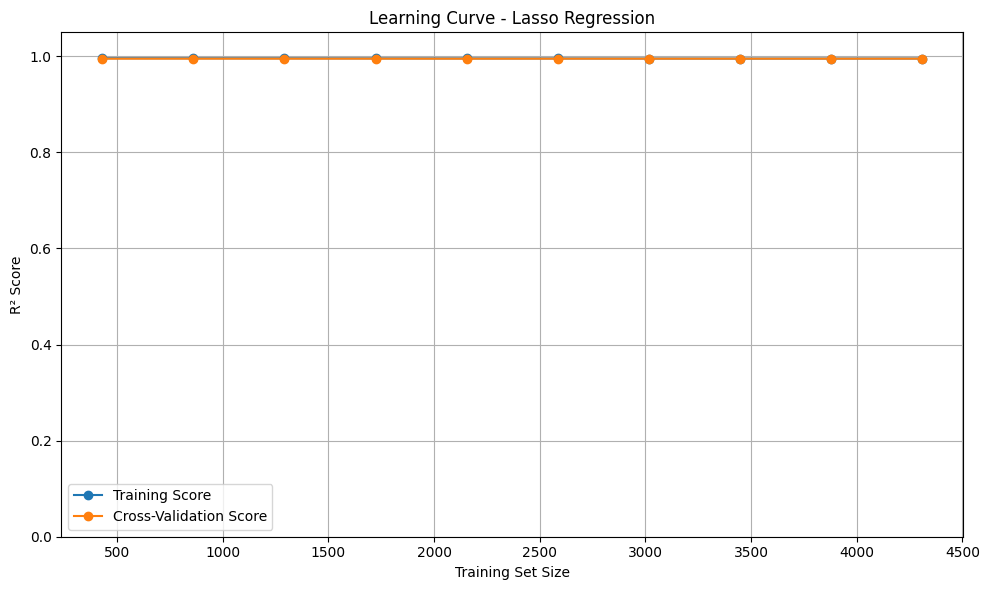

In [ ]:
# Lasso Learning Curve (on scaled data)
train_sizes, train_scores, val_scores = learning_curve(
    lasso_best, X_train_scaled, y_train,
    cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Cross-Validation Score")
plt.title("Learning Curve - Lasso Regression")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

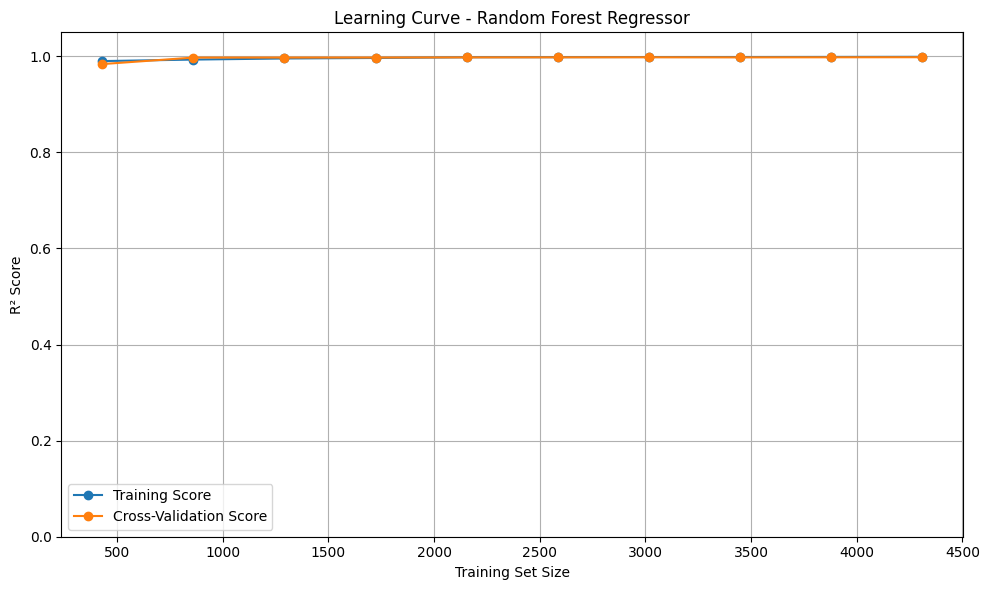

In [ ]:

# learning curve data for Random Forest
train_sizes, train_scores, val_scores = learning_curve(
    rf_best, X_train_raw, y_train,
    cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute average scores
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Cross-Validation Score")
plt.title("Learning Curve - Random Forest Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

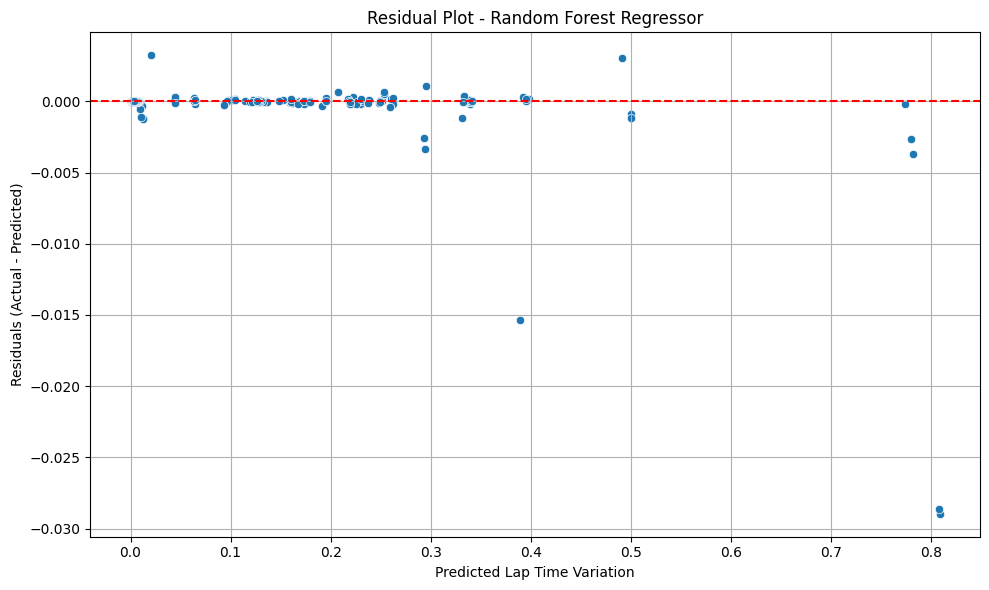

In [ ]:

# Predict on test set
rf_test_preds = rf_best.predict(X_test_raw)

# Calculate residuals
rf_residuals = y_test - rf_test_preds

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_test_preds, y=rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Random Forest Regressor")
plt.xlabel("Predicted Lap Time Variation")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Evaluation Summary
Each model was evaluated using R-squared score, Mean Squared Error, and Mean Absolute Error. The goal is to find the model with an R-squared score closest to 1 and an MSE and MAE score closest to 0. The Random Forest Regressor Model outperformed all of the others. The R score by Model plot shows how each model's R score was high and very close to one. However, differences in the models can be seen in the MSE by model and MAE by model plots, where the Random Forest Regressor is close to 0 while the Linear, Ridge, and Lasso are higher. The XGBoost had a higher MSE than MAE score, but still didn't perform as well as the random forest regressor. Learning curves and residual plots for each model give more insight into how the model performed. The linear, lasso, and ridge regression residual plots all show a curve in points between 0 and 0.4 on the X axis. The curve indicates the model has missed a non-linear relationship. The XGBoost residual plot had points scattered in the same area on the x axis, but all close to/ just above the red line, not in a curved fashion. This shows the model is slightly underestimating lap time variation and being a little too optimistic. The Random Forest Regressor residual plot shows most points across the red line close to zero, with fewer outliers than the other models, which is further evidence that the model is performing best. However, since most of the points on all residual plots were between 0 and 0.4 on the x axis this indicates that the models are focused around a narrow region and not making extreme predictions, which is good for stability, but since actual values sometimes fall outside that, the model should expand feature interactions. After evaluating the Learning Curves for all the models, the only one showing significant worry is the ridge regression with the training score higher than the cross- validation which indicates the model is underfit. Other than that all other learning curves show good performance. Overall, the Random Forest Regressor had the best test set performance with the most stable residuals and highest generalization.

# Model Interpretation

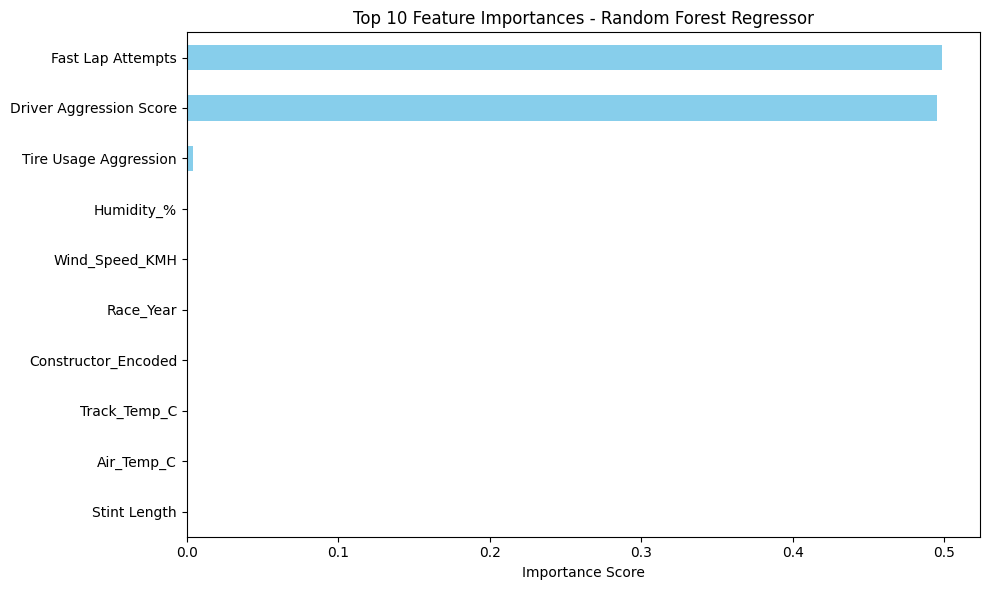

Number of non-zero importances: 14


In [ ]:
# Get feature importances and sort them (Random Forest)
rf_importance = pd.Series(rf_best.feature_importances_, index=X_train_raw.columns)
rf_importance_sorted = rf_importance.sort_values(ascending=True).tail(10)

# Plot top 10 important features (Random Forest)
plt.figure(figsize=(10, 6))
rf_importance_sorted.plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances - Random Forest Regressor")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print("Number of non-zero importances:", sum(rf_best.feature_importances_ > 0))

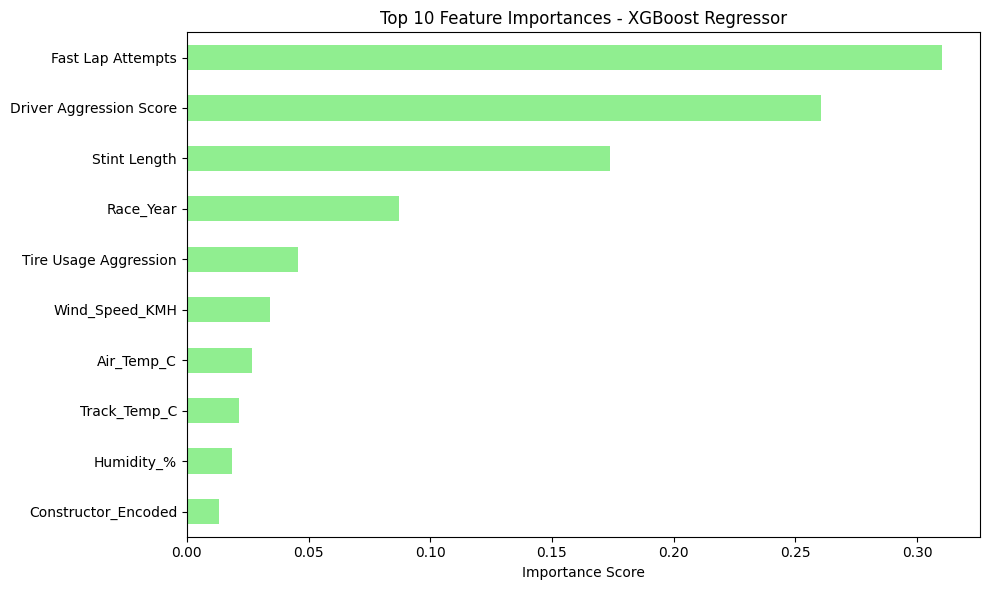

In [ ]:
# Get XGBoost feature importances and sort them
xgb_importance = pd.Series(xgb_best.feature_importances_, index=X_train_raw.columns)
xgb_importance_sorted = xgb_importance.sort_values(ascending=True).tail(10)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
xgb_importance_sorted.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Feature Importances - XGBoost Regressor")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

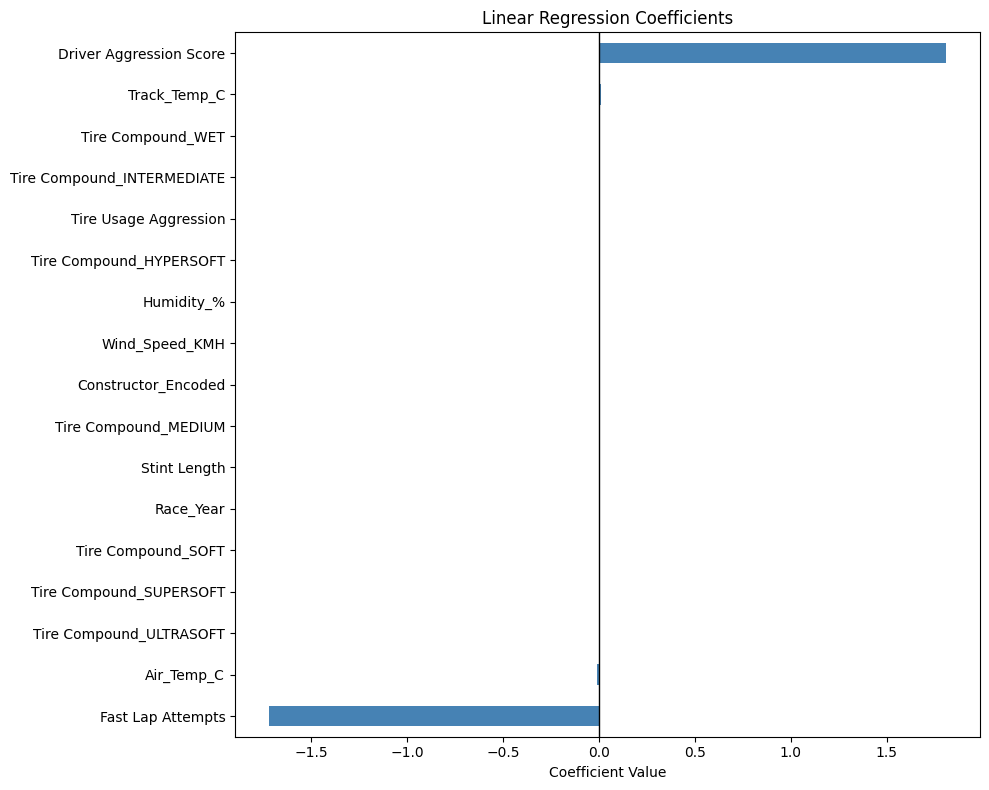

In [ ]:
# Create series of coefficients (Linear Regression Model)
lr_coefs = pd.Series(lr_model.coef_, index=X_train_scaled.columns).sort_values()

# Plot
plt.figure(figsize=(10, 8))
lr_coefs.plot(kind='barh', color='steelblue')
plt.axvline(0, color='black', linewidth=1)
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

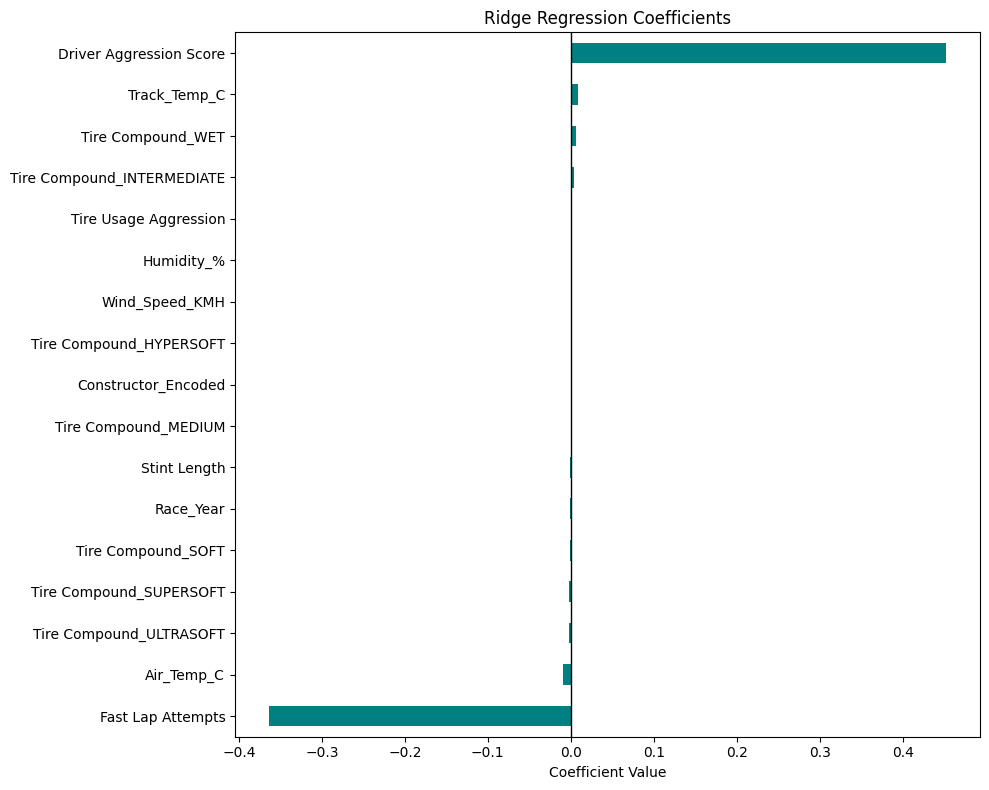

In [ ]:
#Ridge Regression Coef Plot
ridge_coefs = pd.Series(ridge_best.coef_, index=X_train_scaled.columns).sort_values()

plt.figure(figsize=(10, 8))
ridge_coefs.plot(kind='barh', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

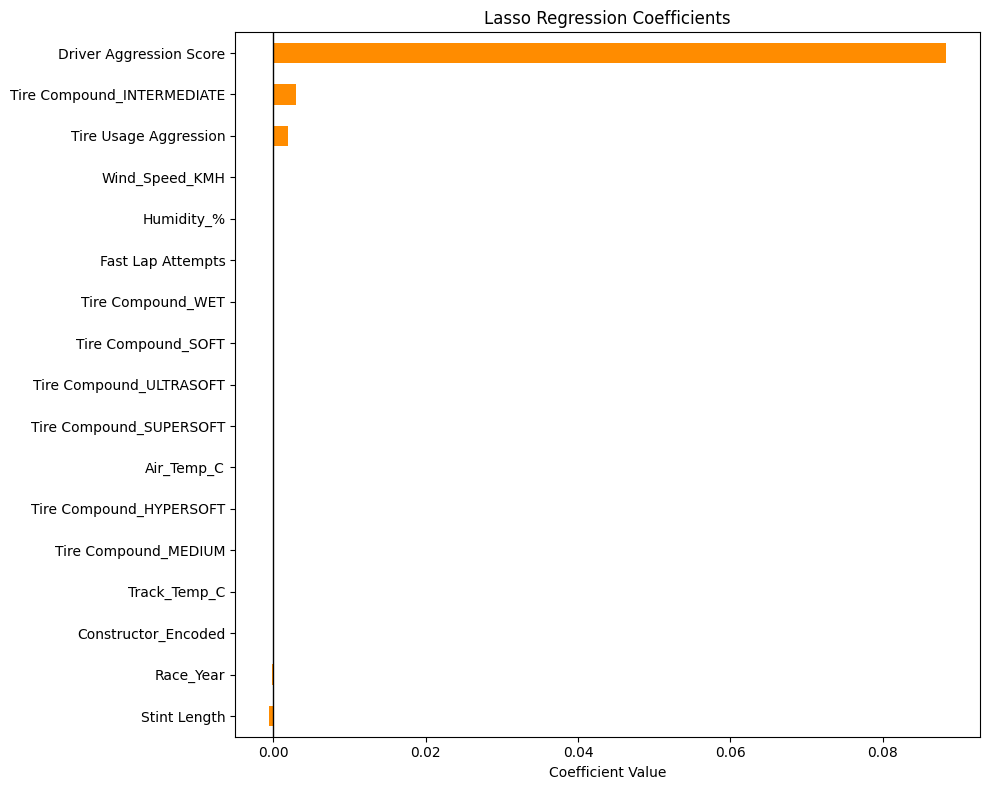

In [ ]:
# Lasso Regression Plot
lasso_coefs = pd.Series(lasso_best.coef_, index=X_train_scaled.columns).sort_values()

plt.figure(figsize=(10, 8))
lasso_coefs.plot(kind='barh', color='darkorange')
plt.axvline(0, color='black', linewidth=1)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

## Model Interpretation Summary
Started out plotting the feature importance plots for the random forest regressor and the XGBoost regressor. Shocked to see the random forest regressor held the fast lap attempts and the driver aggression score very high, but almost zero importance on all other features. Compared to the XGBoost feature plot, which still held fast lap attempts and driver aggression higher than all other features, but still included stint length shortly behind and the weather conditions with some importance.


Three coefficient plots for linear, lasso, and ridge regression displayed which coefficients increased and decreased the predicted lap time. The linear model shows the driver aggression increases predicted lap time variation, while fast lap attempts offsets in decreasing lap variation. The ridge regression plot is very similar to the linear but shows track temp, wet tires, and intermediate tires all slightly increase predicted lap time while air temp and soft tires decrease it. The lasso regression coefficient plot shows driver aggression, intermediate tires, and tire usage aggression all increase the predicted lap time variation.


# Conclusion

This project applied end-to-end machine learning workflow to predict lap time variation in Formula One racers using driver behavior, race-day conditions, and strategy data. Through data preparation, exploratory analysis, modeling, and evaluation, the Random Forest Regressor provided the most robust model, offering the best predictive performance and generalizability.
Driver behavior, including aggression and fast lap attempts, was consistently the most influential factor in lap time variation across all models. Tire strategy had varying levels of influence across the model types. The XGBoost model was better at picking up on influences from stint length and tire usage than the Random Forest model. Weather conditions played a moderate role, higher track temperatures slightly increased lap time variation, which suggests that when the track is extremely hot, it reduces tire consistency, increasing pit frequency. The linear models revealed interpretable relationships between increased aggression leading to increased lap variation, and fast lap attempts decreasing lap variation. All of these findings show that driver style and strategy must be dynamically adjusted to track conditions for optimal lap consistency.

These findings are beneficial to race teams because the engineers could use the Random Forest model to estimate lap time variability for a given race to make decisions on tire compound, stint length, and how aggressively they should push for fastest laps. Driver coaches can leverage the model feedback to adjust their drivers' style depending on the environmental conditions. Analytics teams can use the results to improve race simulations and post-race debriefs to align new strategies with previous performance losses.

Some limitations of the data and project include that the dataset only included completed race stints, and drivers who were disqualified or did not finish were not modeled. The residual plots indicated that the models have a heavy focus on a narrow prediction range, which means the models may not generalize well to edge cases with extreme performance or failures. Due to some missing data and inconsistencies in the data, not all features were fully leveraged, such as pit lap and some different tire variables. Some improvements could be made to the model, such as using time-series modeling or sequence learning, which would better capture the progression of performance over the whole race rather than single snapshots. Incorporating the DNF and crash data into a separate classification might help understand how driving style and setup could increase risks for not finishing.
